In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
%cd D:/simplilear/python/data sets/Datasets

D:\simplilear\python\data sets\Datasets


In [2]:
data= pd.read_csv("usedcarsales.csv")

In [3]:
data

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,AutoType,MetColorType
0,1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
1,2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
2,3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Manual,Metcolor
3,4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Manual,NonMetcolor
4,5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Manual,NonMetcolor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1432,7500,69,20544,Petrol,86,1,0,1300,3,1025,Manual,Metcolor
1432,1433,10845,72,19000,Petrol,86,0,0,1300,3,1015,Manual,NonMetcolor
1433,1434,8500,71,17016,Petrol,86,0,0,1300,3,1015,Manual,NonMetcolor
1434,1435,7250,70,16916,Petrol,86,1,0,1300,3,1015,Manual,Metcolor


In [4]:
data.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight', 'AutoType', 'MetColorType'],
      dtype='object')

In [5]:
data.describe()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,718.500000,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,414.681806,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,359.750000,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,718.500000,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,1077.250000,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,1436.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


<AxesSubplot:>

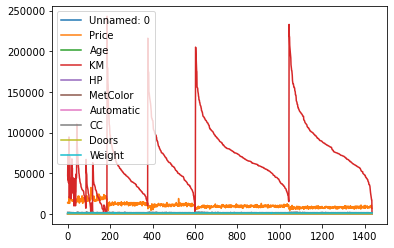

In [6]:
data.plot()

In [7]:
data.Price.groupby(data.Automatic).mean()

Automatic
0    10701.69174
1    11224.62500
Name: Price, dtype: float64

In [8]:
# Test Null Average Price of Automatic 0 & 1 Cars Equal
# Test Null Average Age of Automatic 0 & 1 Cars  Equal
# Test Null Average Price of dufferent FuelType Cars Equal
# Test NUll Average KM of different FuelType Cars Equal
# Test No Association between Fueltype & Automatic
# Test No Association Between Doors & Fue



In [9]:
auto=data[data.Automatic==1]
manual=data[data.Automatic==0]

In [10]:
from scipy.stats import ttest_ind

In [11]:
ttest_ind(auto.Price,manual.Price,equal_var=False)#fail to reject null

Ttest_indResult(statistic=1.249930314314651, pvalue=0.21461957865398504)

In [12]:
# Test Null Average Age of Automatic 0 & 1 Cars  Equal
# Test Null Average Price of dufferent FuelType Cars Equal
# Test NUll Average KM of different FuelType Cars Equal
# Test No Association between Fueltype & Automatic
# Test No Association Between Doors & Fue

In [13]:
data.Age.groupby(data.Automatic).mean()

Automatic
0    55.803835
1    58.375000
Name: Age, dtype: float64

In [14]:
ttest_ind(auto.Age,manual.Age,equal_var=False)#fail to reject null

Ttest_indResult(statistic=1.171996382758743, pvalue=0.24436023798492446)

In [15]:
# Test Null Average Price of dufferent FuelType Cars Equal
# Test NUll Average KM of different FuelType Cars Equal
# Test No Association between Fueltype & Automatic
# Test No Association Between Doors & Fue

In [16]:
data.KM.groupby(data.FuelType).mean()

FuelType
CNG       117865.588235
Diesel    111977.580645
Petrol     62542.342563
Name: KM, dtype: float64

In [17]:
cng=data[data.FuelType=="CNG"]
diesel=data[data.FuelType=="Diesel"]
pet=data[data.FuelType=="Petrol"]

In [18]:
from scipy.stats import f_oneway

In [19]:
f_oneway(cng.KM,pet.KM,diesel.KM)#we reject null

F_onewayResult(statistic=165.7700222443794, pvalue=1.7334538250607492e-65)

In [20]:
f_oneway(cng.Price,pet.Price,diesel.Price)#we reject null

F_onewayResult(statistic=3.1171479782774187, pvalue=0.044583699346313316)

In [21]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data.FuelType,data.Automatic))#reject null

(10.255335220371334,
 0.005930376304755165,
 2,
 array([[1.60529248e+01, 9.47075209e-01],
        [1.46364903e+02, 8.63509749e+00],
        [1.19358217e+03, 7.04178273e+01]]))

In [22]:
data.Doors.groupby(data.FuelType).mean()

FuelType
CNG       4.117647
Diesel    4.103226
Petrol    4.023734
Name: Doors, dtype: float64

In [23]:
f_oneway(cng.Doors,diesel.Doors,pet.Doors)#fail to reject null

F_onewayResult(statistic=0.547518918370349, pvalue=0.5785039933052822)